# Chapter: Exploratory Analysis and Visualization of Dynamic Dataset

## Topic: CCF Illustration

In [11]:
# import packages 
import numpy as np, matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from statsmodels.tsa.stattools import ccf

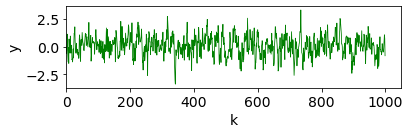

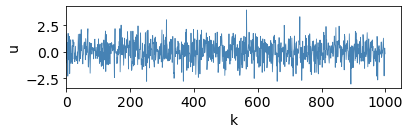

In [12]:
# read data
data = np.loadtxt('simpleInputOutput.csv', delimiter=',')
u = data[:,0]; y = data[:,1]

# time-plot
# plot y
plt.figure(figsize=(6,1.5))
plt.plot(y, 'g', linewidth=0.8)
plt.ylabel('y'), plt.xlabel('k'), plt.xlim(0)
plt.show()

# plot x
plt.figure(figsize=(6,1.5))
plt.plot(u, 'steelblue', linewidth=0.8)
plt.ylabel('u'), plt.xlabel('k'), plt.xlim(0)
plt.show()

In [13]:
# compute CCF values for lags = -20 to 20
ccf_vals_ = ccf(y, u, adjusted=False) # ccf for lag >= 0
ccf_vals_neg_lags = np.flip(ccf(u, y, adjusted=False)) # ccf for lag -1000 to 0; using asymmetric property 
ccf_vals = np.hstack((ccf_vals_neg_lags[-21:-1], ccf_vals_[:21]))

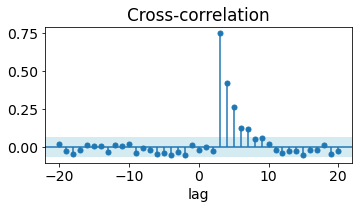

In [14]:
# generate CCF plot
lags, conf_int = np.arange(-20,21), 2/np.sqrt(len(y))

plt.figure(figsize=(5.5,2.5))
plt.vlines(lags, [0], ccf_vals)
plt.axhline(0, -20, 20)
plt.plot(lags, ccf_vals, marker='o', markersize=5, linestyle='None')
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.xlabel('lag'), plt.title('Cross-correlation')
plt.show()